In [56]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

### Feature Dataframe

In [23]:
features = []
for line in open('features.json', 'r'):
    features.append(json.loads(line))

df_features = pd.DataFrame(features)

In [30]:
df_features.sort_values(by='reviewId').head()

reviewId      appId             username  length  label  \
8612    6135871  290822013              Poio102     166      0   
1085    6137811  288657710             SFSmitty     133      0   
11316   6178398  286506398  opinonated consumer     378      0   
122     6488564  293519917    Waluigi gonna win     459      0   
13481   6653575  283909107         Sohil Sikdar     140      0   

       user_reviews_total  user_reviews_5  user_reviews_4  user_reviews_3  \
8612                    4       75.000000       25.000000        0.000000   
1085                   11       54.545455       18.181818       18.181818   
11316                   1        0.000000        0.000000        0.000000   
122                    23       95.652174        0.000000        4.347826   
13481                   1      100.000000        0.000000        0.000000   

       user_reviews_2  user_reviews_1  user_frequency  user_account_usage  \
8612              0.0        0.000000    3.140798e+07            94223940   
1085              0.0        9.090909    2.014597e+07           201459660   
11316             0.0      100.000000             NaN                   0   
122               0.0        0.000000    1.152157e+07           253474560   
13481             0.0        0.000000             NaN                   0   

       app_reviews_total  app_reviews_5  app_reviews_4  app_reviews_3  \
8612                 456      54.385965      17.982456       6.140351   
1085                 573      79.232112      12.041885       3.315881   
11316                 29      37.931034      31.034483      10.344828   
122                  679      53.166421      18.556701      11.929308   
13481                855      71.812865      13.918129       5.497076   

       app_reviews_2  app_reviews_1  
8612        5.263158      16.228070  
1085        1.047120       4.363002  
11316       0.000000      20.689655  
122         5.891016      10.456554  
13481       3.274854       5.497076

* **Review frequency:** The average time in seconds between all reviews provided.
* **Account usage:** The lifetime of the reviewers account, i.e., the timespan between the first and the last review provided in seconds). 
* **User total reviews:** The total number of reviews received for all app versions  
* **Length:** The characters count.
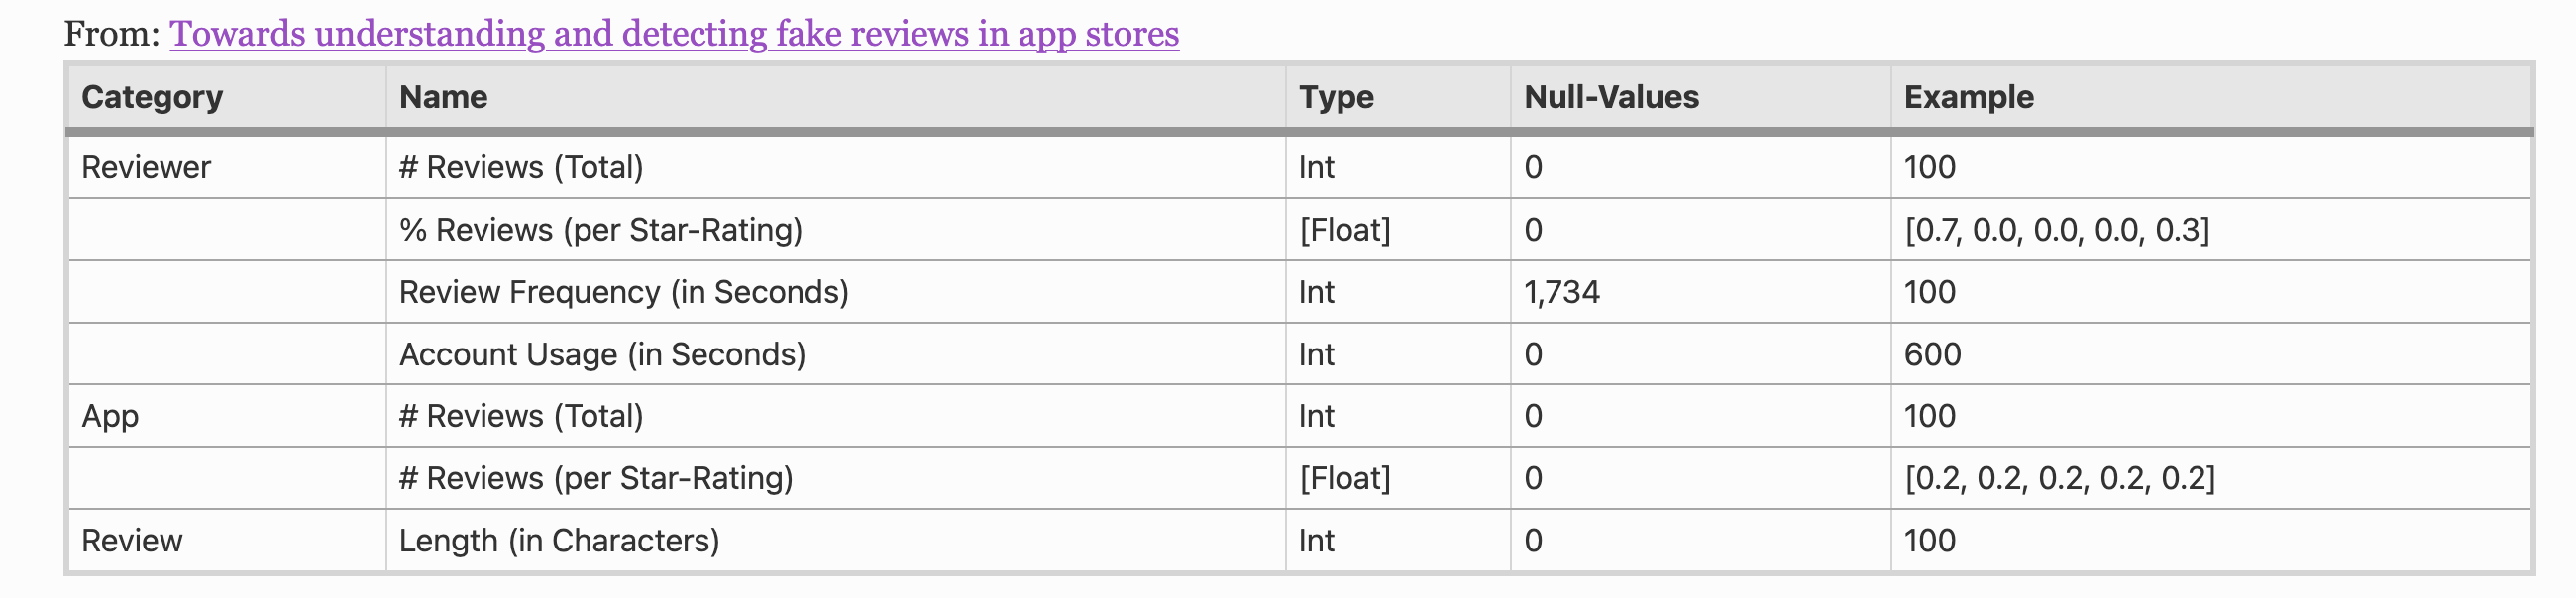

In [38]:
print('The shape of df:', df_features.shape)

df_features.label.value_counts()

# A balanced truthset of 16,000 reviews. 
# Of these reviews, 8,000 are randomly selected fake and 8,000 are randomly selected official reviews. 

The shape of df: (16000, 19)


0    8000
1    8000
Name: label, dtype: int64

In [39]:
df_features.dtypes

reviewId                int64
appId                   int64
username               object
length                  int64
label                   int64
user_reviews_total      int64
user_reviews_5        float64
user_reviews_4        float64
user_reviews_3        float64
user_reviews_2        float64
user_reviews_1        float64
user_frequency        float64
user_account_usage      int64
app_reviews_total       int64
app_reviews_5         float64
app_reviews_4         float64
app_reviews_3         float64
app_reviews_2         float64
app_reviews_1         float64
dtype: object

In [41]:
df_features['user_frequency'] = df_features['user_frequency'].apply(lambda x: '%.3f' % x)

In [28]:
df_features.isna().sum()
# The review frequency is in 1,734 cases undefined because only a single review was provided by the reviewer.
# In this case, we set the frequency to lifetime of the app store, which is 9 years.
# The App Store opened for business on July 10, 2008

reviewId                 0
appId                    0
username                 0
length                   0
label                    0
user_reviews_total       0
user_reviews_5           0
user_reviews_4           0
user_reviews_3           0
user_reviews_2           0
user_reviews_1           0
user_frequency        1734
user_account_usage       0
app_reviews_total        0
app_reviews_5            0
app_reviews_4            0
app_reviews_3            0
app_reviews_2            0
app_reviews_1            0
dtype: int64

In [42]:
df_features.head()

reviewId       appId        username  length  label  user_reviews_total  \
0  1400491181  1064216828      Desbot5000      30      0                   5   
1  1224172704   957350400         Jcrew62     182      1                  58   
2   496593411   469960709       Redskwirl      94      0                   4   
3  1528840746   993428592  Best_AppReview     111      1                  62   
4   438790115   418684609      Bishop0611      20      0                   6   

   user_reviews_5  user_reviews_4  user_reviews_3  user_reviews_2  \
0       80.000000        0.000000        0.000000        0.000000   
1       70.689655       18.965517        3.448276        3.448276   
2       75.000000       25.000000        0.000000        0.000000   
3       88.709677        9.677419        1.612903        0.000000   
4       66.666667       16.666667        0.000000        0.000000   

   user_reviews_1 user_frequency  user_account_usage  app_reviews_total  \
0       20.000000   25757655.000           103030620              26840   
1        3.448276     509000.000            29013000                 76   
2        0.000000   41974940.000           125924820              68895   
3        0.000000    2239957.377           136637400                104   
4       16.666667   30676392.000           153381960               1597   

   app_reviews_5  app_reviews_4  app_reviews_3  app_reviews_2  app_reviews_1  
0      68.446349      15.994784       5.473174       3.330849       6.754844  
1      27.631579      15.789474       6.578947       0.000000      50.000000  
2      56.623848      14.488715       6.261703       5.030844      17.594891  
3      90.384615       7.692308       1.923077       0.000000       0.000000  
4      47.401378      13.400125       8.515967       6.887915      23.794615

<AxesSubplot:xlabel='length', ylabel='Count'>

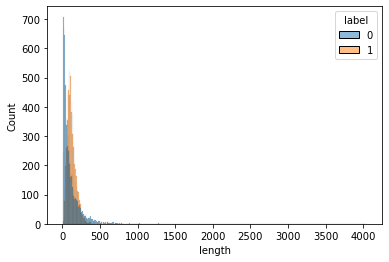

In [66]:
sns.histplot(data=df_features, x='length', hue='label' )

<AxesSubplot:xlabel='label', ylabel='user_reviews_total'>

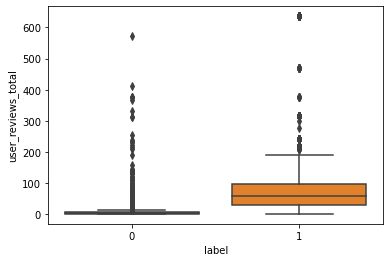

In [74]:
sns.boxplot(x="label", y="user_reviews_total", data=df_features)

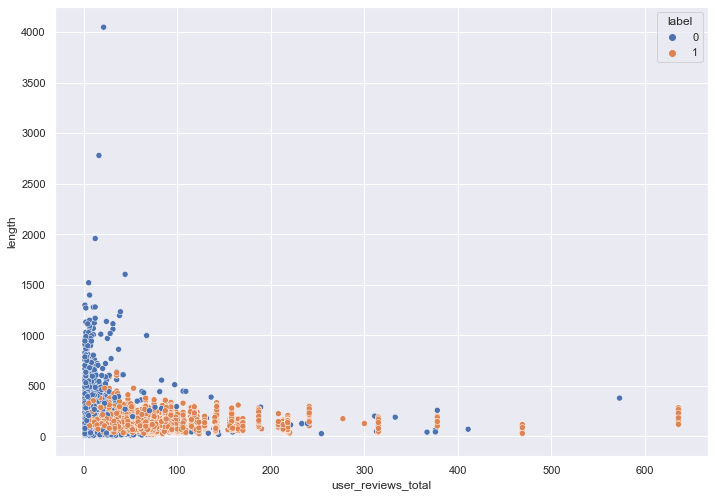

In [79]:
sns.scatterplot(data=df_features, x="user_reviews_total", y="length", hue='label')
sns.set(rc={'figure.figsize':(14,3)})

In [22]:
reviews = []
for line in open('reviews.json', 'r'):
    reviews.append(json.loads(line))

df_reviews = pd.DataFrame(reviews)

In [26]:
df_reviews.sort_values(by='review_id').head(10)

review_id  package_name                        title  \
9975     6135871     290822013                     Good app   
6217     6137811     288657710                 Constitution   
722      6178398     286506398  does not find interest rate   
2405     6488564     293519917                    Brilliant   
2463     6653575     283909107                      Awesome   
5183     6683672     291322250              Controls bad...   
14394    6868150     285915267             No coins needed!   
100      6879161     284910005                     Terrible   
4281     6893059     294742103            A Sweet Sweet App   
10033    6979053     292421271                    Love it!!   

                                                    body  rating  \
9975   It's good, it works and you get good data! I w...       4   
6217   Great app! More people should read it. It give...       5   
722    some key functions show error messages. no sup...       1   
2405   This game just feels right. The control is muc...       5   
2463   Really well polished app. I use the one finger...       5   
5183   The original is better, the one that came with...       3   
14394  "Love it. The style is before my time, but as ...       5   
100    All u have to do is tilt your I pod upside dow...       1   
4281   Once I finally figured out how to add my own p...       5   
10033  This is the only game on my iPhone that I keep...       5   

                  username                           date  voteCount  voteSum  \
9975               Poio102  2008-09-18T04:59:00.000+02:00          9        7   
6217              SFSmitty  2008-09-18T10:06:00.000+02:00          0        0   
722    opinonated consumer  2008-09-22T00:32:00.000+02:00          6        4   
2405     Waluigi gonna win  2008-10-17T16:32:00.000+02:00         15        7   
2463          Sohil Sikdar  2008-10-30T03:33:00.000+01:00          0        0   
5183                dac123  2008-11-02T08:41:00.000+01:00          0        0   
14394                XavaX  2008-11-19T02:28:00.000+01:00          0        0   
100           Cutestuff101  2008-11-20T01:19:00.000+01:00          0        0   
4281             Pilgrim49  2008-11-21T06:10:00.000+01:00          5        5   
10033                ixLoc  2008-11-22T22:07:00.000+01:00          1        1   

           userId  
9975   19090953.0  
6217   27224804.0  
722    38970973.0  
2405   28111367.0  
2463   41946914.0  
5183   38617307.0  
14394  14854202.0  
100    42677010.0  
4281   26476348.0  
10033  32061630.0

In [14]:
df_reviews.shape

(16000, 10)

## Apps Dataframe

In [32]:
apps = []
for line in open('apps.json', 'r'):
    apps .append(json.loads(line))

df_apps  = pd.DataFrame(apps)
df_apps.head()

appId                                           appName   artistId  \
0  281656475                                           PAC-MAN  281656478   
1  281704574  AIM: Chat, Free Text, Photo Share, Voice Message  281704577   
2  281796108                         Evernote - stay organized  281796111   
3  281940292   WeatherBug - Local Weather, Radar, Maps, Alerts  281940295   
4  281941097                                         Bloomberg  281941100   

                                artistName  \
0  BANDAI NAMCO Entertainment America Inc.   
1                                 AOL Inc.   
2                                 Evernote   
3                     Earth Networks, Inc.   
4                     Bloomberg Finance LP   

                                sellerName  \
0  BANDAI NAMCO Entertainment America Inc.   
1                                 AOL Inc.   
2                                 Evernote   
3                     Earth Networks, Inc.   
4                     Bloomberg Finance LP   

                                         description  primaryGenreId  \
0  SAVE 20%, now only $3.99 for a limited time!\n...            6014   
1  "We’ve reinvented the AIM app to provide a cle...            6005   
2  Let Evernote change the way you organize your ...            6007   
3  Download the most popular free weather app pow...            6001   
4  Get comprehensive access to global business an...            6015   

        primaryGenre             genreIds                             genres  \
0              Games  6014,7009,7003,6016  Games,Family,Arcade,Entertainment   
1  Social Networking            6005,6002        Social Networking,Utilities   
2       Productivity            6007,6002             Productivity,Utilities   
3            Weather            6001,6012                  Weather,Lifestyle   
4            Finance            6015,6009                       Finance,News   

   ...  allRatingCount curentRatingAverage currentRatingCount  \
0  ...           21220                 4.5                 15   
1  ...          451600                 4.5                 16   
2  ...          160930                 2.0                287   
3  ...          183511                 0.0                  0   
4  ...           48098                 1.0                359   

  trackContentRating contentAdvisoryRating      kind wrapperType  \
0                 4+                    4+  software    software   
1                 4+                    4+  software    software   
2                 4+                    4+  software    software   
3                 4+                    4+  software    software   
4                 4+                    4+  software    software   

   gameCenterEnabled vppDeviceBasedLicensingEnabled advisories  
0              False                           True        NaN  
1              False                           True        NaN  
2              False                           True        NaN  
3              False                           True        NaN  
4              False                           True        NaN  

[5 rows x 31 columns]

In [34]:
df_apps.shape

(5563, 31)

In [60]:
df_apps.iloc[:4,12:]

version             initialReleaseData             currentReleaseDate  \
0   6.3.2  2008-07-11T09:00:00.000+02:00  2017-02-28T23:09:27.000+01:00   
1   7.3.5  2008-07-11T09:00:00.000+02:00  2017-03-05T19:48:00.000+01:00   
2     8.1  2008-07-11T09:00:00.000+02:00  2017-02-13T22:20:58.000+01:00   
3   4.6.3  2008-07-11T09:00:00.000+02:00  2017-03-13T18:46:44.000+01:00   

  minimumOsVersion                                   supportedDevices  \
0              7.0  iPhone4-iPhone4,iPad2Wifi-iPad2Wifi,iPad23G-iP...   
1              8.0  iPad2Wifi-iPad2Wifi,iPad23G-iPad23G,iPhone4S-i...   
2              9.3  iPad2Wifi-iPad2Wifi,iPad23G-iPad23G,iPhone4S-i...   
3              9.0  iPad2Wifi-iPad2Wifi,iPad23G-iPad23G,iPhone4S-i...   

   fileSizeBytes      features  \
0     96261120.0  iosUniversal   
1     31767552.0  iosUniversal   
2    151493632.0  iosUniversal   
3     90101760.0  iosUniversal   

                                  languageCodesISO2A  allRatingAverge  \
0                      EN,FR,DE,IT,JA,KO,PT,RU,ZH,ES              4.0   
1                                        EN,FR,JA,ES              3.5   
2  CS,DA,NL,EN,FI,FR,DE,ID,IT,JA,KO,MS,NB,PL,PT,R...              4.0   
3                                           EN,PT,ES              3.5   

   allRatingCount  curentRatingAverage  currentRatingCount trackContentRating  \
0           21220                  4.5                  15                 4+   
1          451600                  4.5                  16                 4+   
2          160930                  2.0                 287                 4+   
3          183511                  0.0                   0                 4+   

  contentAdvisoryRating      kind wrapperType  gameCenterEnabled  \
0                    4+  software    software              False   
1                    4+  software    software              False   
2                    4+  software    software              False   
3                    4+  software    software              False   

   vppDeviceBasedLicensingEnabled advisories  
0                            True        NaN  
1                            True        NaN  
2                            True        NaN  
3                            True        NaN

In [36]:
df_apps.columns
# I can use 
# Primary Genre
# Genre
# Price
# allRatingAverge',
#'allRatingCount', 'curentRatingAverage', 'currentRatingCount', 'trackContentRating', 'contentAdvisoryRating'

Index(['appId', 'appName', 'artistId', 'artistName', 'sellerName',
       'description', 'primaryGenreId', 'primaryGenre', 'genreIds', 'genres',
       'price', 'currency', 'version', 'initialReleaseData',
       'currentReleaseDate', 'minimumOsVersion', 'supportedDevices',
       'fileSizeBytes', 'features', 'languageCodesISO2A', 'allRatingAverge',
       'allRatingCount', 'curentRatingAverage', 'currentRatingCount',
       'trackContentRating', 'contentAdvisoryRating', 'kind', 'wrapperType',
       'gameCenterEnabled', 'vppDeviceBasedLicensingEnabled', 'advisories'],
      dtype='object')

In [37]:
df_apps.isna().sum()

appId                                0
appName                              0
artistId                             0
artistName                           0
sellerName                           0
description                          0
primaryGenreId                       0
primaryGenre                         0
genreIds                             0
genres                               0
price                                0
currency                             0
version                              0
initialReleaseData                   0
currentReleaseDate                   0
minimumOsVersion                     0
supportedDevices                     0
fileSizeBytes                        8
features                          1456
languageCodesISO2A                  15
allRatingAverge                      0
allRatingCount                       0
curentRatingAverage                  0
currentRatingCount                   0
trackContentRating                   0
contentAdvisoryRating    

In [80]:
df_apps.genres.value_counts()

Photo & Video,Entertainment         140
Shopping,Lifestyle                   94
Utilities,Productivity               93
Productivity,Utilities               85
Health & Fitness,Lifestyle           80
                                   ... 
Games,Role Playing,Sports,Racing      1
Games,Family,Word,Entertainment       1
Games,Reference,Trivia,Word           1
Weather,Photo & Video                 1
Games,Role Playing,Travel,Puzzle      1
Name: genres, Length: 1195, dtype: int64